# ML Trader

In [1]:
from utils.packages import *
from utils.variables import *
from utils.i_o import *
from utils.dir_slope import *
from utils.engine import *
from utils.loops import *
from utils.order import *
import winsound

In [2]:
data["plot"] = True

data['pl_move_trail_trigger']   = 0.0020
data['stop_loss_pip']           = 0.0015

data['start_date'] = {'year':2021, 'month':5, 'date':1}
data['end_date']   = {'year':2021, 'month':5, 'date':10}

In [3]:
%%time
data = get_date_list(data)
data = read_data(data)
data = run_engine(data)

 14%|████▊                              | 49435/356831 [04:44<55:07, 92.93it/s]

pls   -0.00037
dtype: float64
--------------------------------------
                 date ord_types               close_type      pls
0 2021-05-03 17:48:29     short         short_sema_close -0.00106
1 2021-05-03 22:39:40      long  simple_slema_move_close  0.00069


 14%|████▊                             | 49941/356831 [04:49<29:40, 172.41it/s]


KeyboardInterrupt: 

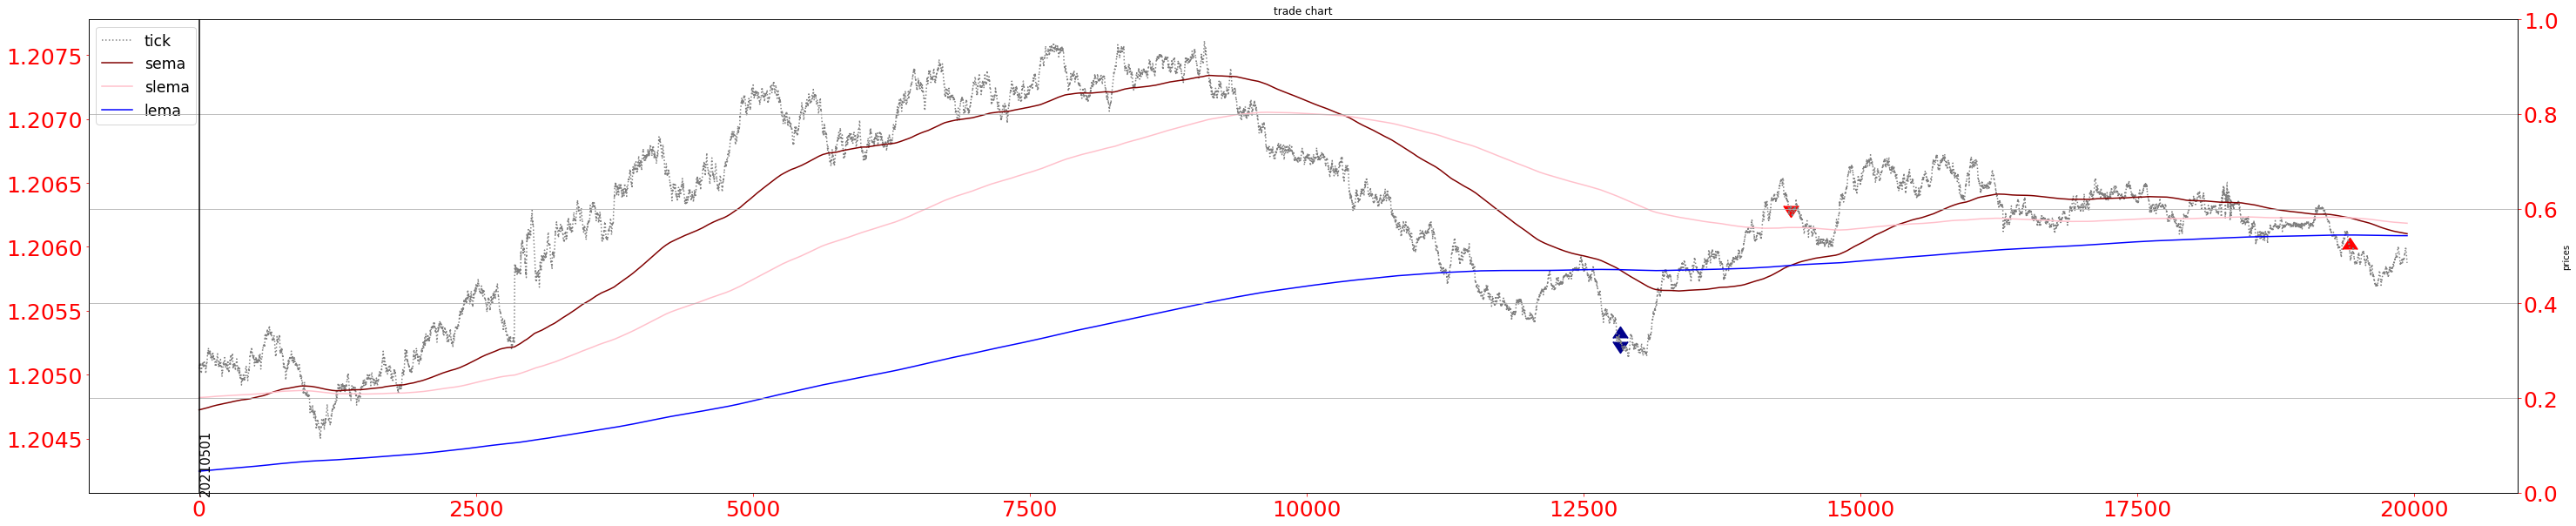

-----------------------------------------------------
date_val          : ['20210501', '20210502', '20210503', '20210504', '20210505', '20210506', '20210507', '20210508', '20210509', '20210510']
Total PL : -0.00037
-------------
net_pl            : -0.00037/0.00175
-------------
+ve               : num= 1    sum= +0.00069    avg= +0.00069
-ve               : num= 1    sum= -0.00106    avg= -0.00106
-----------------------------------------------------
date_val
3   -0.00037
Name: pls, dtype: float64
-----------------------------------------------------
 0.00069    1
-0.00106    1
Name: pls, dtype: int64
-----------------------------------------------------


In [4]:
if data["plot"]:
    data = adjust_plot_list_lengths(data)
    plot_graph(data)
    
print('-----------------------------------------------------')
print_report(data)
print('-----------------------------------------------------')
print(data['report_df'].groupby(['date_val'])['pls'].sum())
print('-----------------------------------------------------')
print(data['report_df']['pls'].value_counts())
print('-----------------------------------------------------')
data['report_df']

winsound.PlaySound('C:\\Windows\\Media\\tada.wav', winsound.SND_ASYNC)